In [10]:
#🟢 PART 1 — Setup + Load Data

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Make plots look nice
sns.set(style="whitegrid")

# 📁 Load the dataset
df = pd.read_csv("diabetes.csv")
print("Dataset shape:", df.shape)

# 👀 Preview the data
df.head()


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# PART 2 — Check for Missing (Zero) Values

# ⚠️ Columns where zero = missing
columns_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 🔍 Count how many zeros are in each of those
for col in columns_with_zero_invalid:
    print(f"{col}: {(df[col] == 0).sum()} zeros")



Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [24]:
#PART 3 — Replace Zero with NaN for Visualization

df_replaced = df.copy()
columns_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_replaced[columns_with_zero_invalid] = df_replaced[columns_with_zero_invalid].replace(0, np.nan)



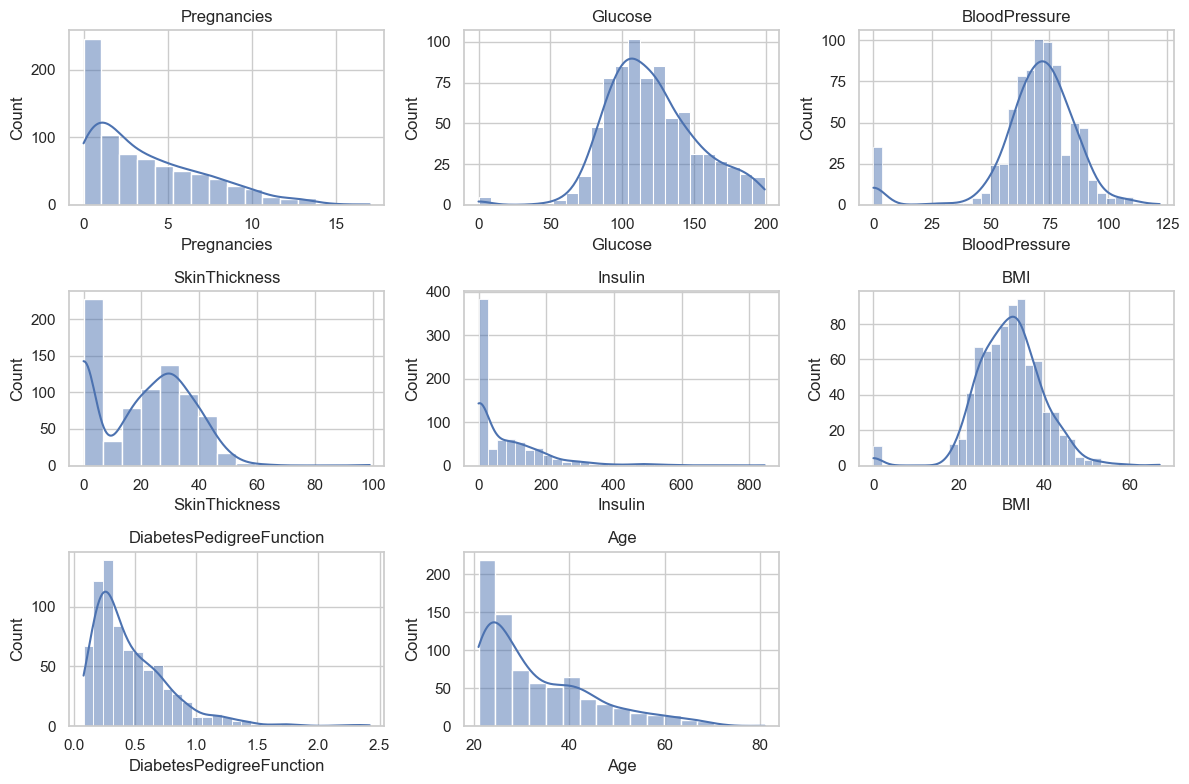

In [14]:
# PART 4 — Plot Distributions

# 📊 Plot distribution of each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
#PART 5 — Correlation Heatmap

# 🔥 See which features are most correlated
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




In [26]:
#PART 6 — Fill Missing Values (Median Imputation)

# ✅ Fill zero-based missing values using median
df_cleaned = df_replaced.fillna(df_replaced.median())

# ✅ Confirm there are no missing values
df_cleaned.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
# PART 7 — Train/Test Split

from sklearn.model_selection import train_test_split

X = df_cleaned.drop("Outcome", axis=1)
y = df_cleaned["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (614, 8)
Test set size: (154, 8)


In [30]:
#PART 8 — Train XGBoost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


C:\Users\rithi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7597402597402597


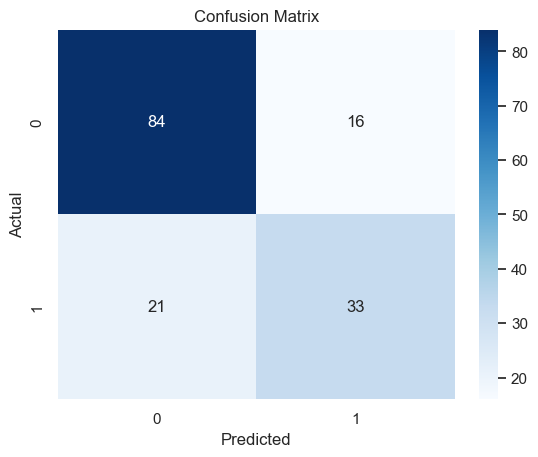


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [32]:
 #PART 9 — Evaluate the Model

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [7]:
!pip install xgboost


In [34]:
!pip install shap --upgrade

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? et

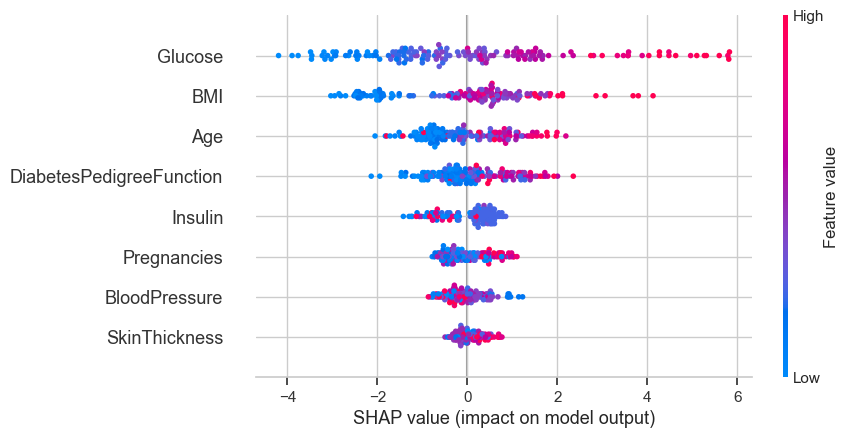

In [36]:
#PART 10 — SHAP Setup & Global Explanation

import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Global feature importance
shap.plots.beeswarm(shap_values)


In [ ]:
# Step 11: Save Your Model (for reuse or app later)
import joblib

# Save the trained model
joblib.dump(model, "model.pkl")


In [38]:
#model.pkl

import joblib

# Save the trained model to a file
joblib.dump(model, "model.pkl")


['model.pkl']